In [1]:
import cv2
import matplotlib.pyplot as plt

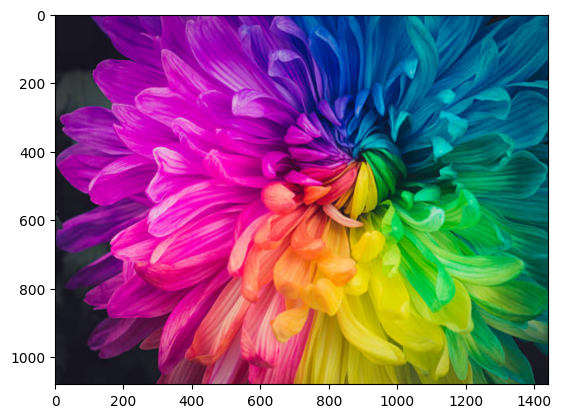

In [2]:
img1 = cv2.imread('../data/download.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (1440, 1080))
plt.imshow(img1)

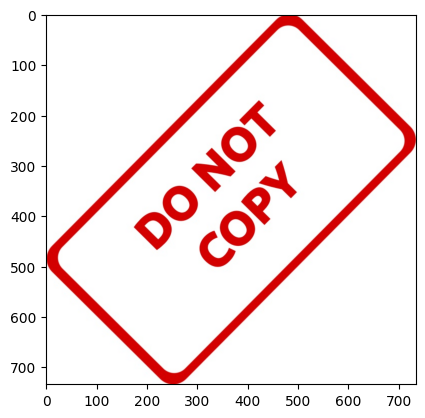

In [3]:
img2 = cv2.imread('../data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [4]:
img1.shape, img2.shape

((1080, 1440, 3), (734, 734, 3))

In [5]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=0)
plt.imshow(blended)

error: OpenCV(4.10.0) /io/opencv/modules/core/src/arithm.cpp:658: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [41]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1.shape, img2.shape

((1080, 1440, 3), (1080, 1440, 3))

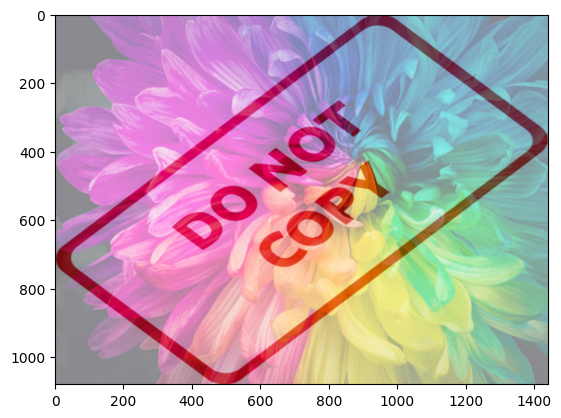

In [42]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blended)

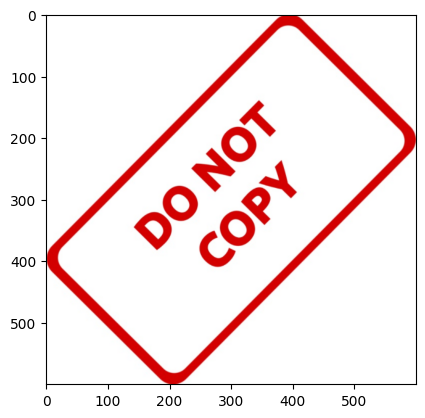

In [43]:
img2 = cv2.resize(img2, (600, 600))
plt.imshow(img2)

In [6]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

In [7]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

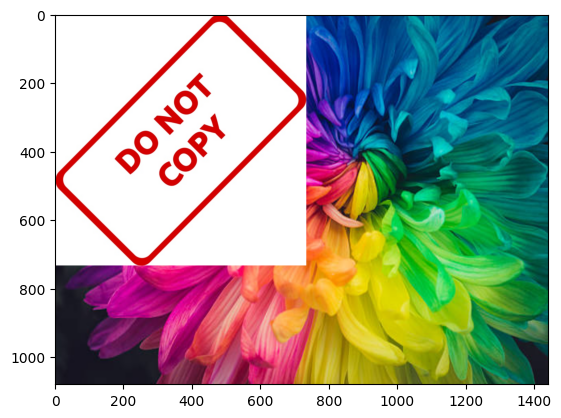

In [8]:
plt.imshow(large_img)

In [9]:
img1 = cv2.imread('../data/download.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (1080, 1440))
img2 = cv2.imread('../data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (600, 600))

img1.shape, img2.shape

((1440, 1080, 3), (600, 600, 3))

In [10]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
x_offset, y_offset

(480, 840)

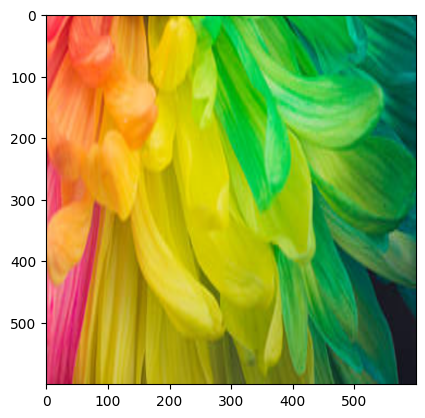

In [11]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi)

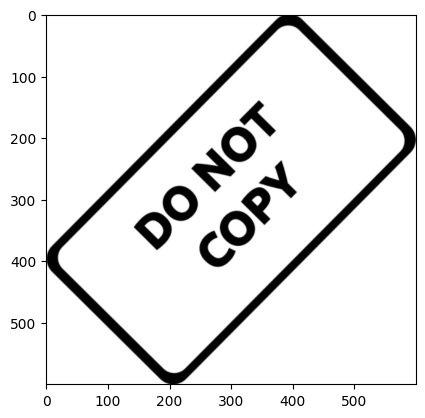

In [12]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2_gray, cmap='gray')

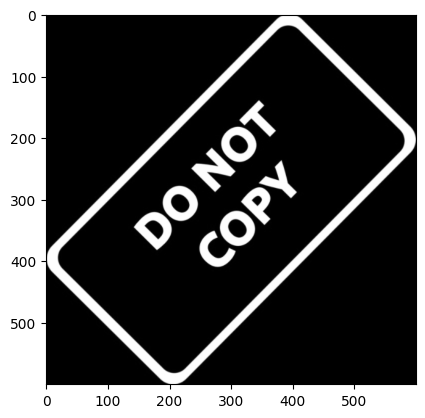

In [13]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap='gray')

In [14]:
mask_inv.shape

(600, 600)

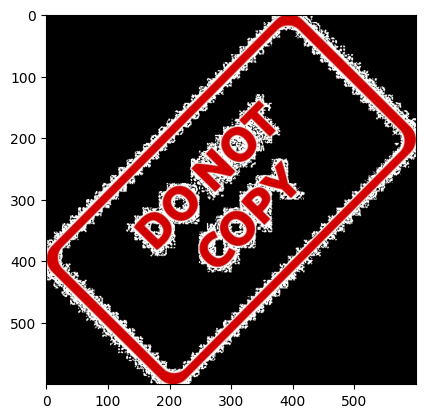

In [15]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

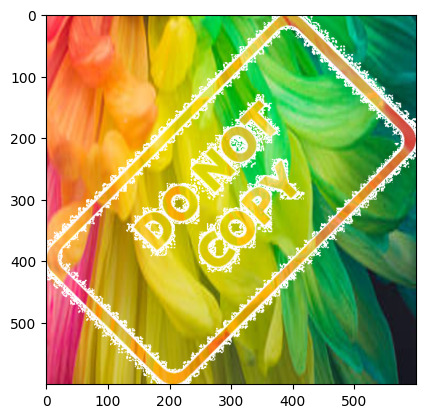

In [16]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

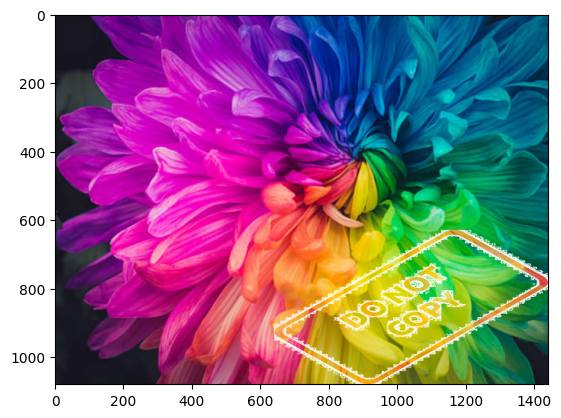

In [18]:
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = final_roi
img1 = cv2.resize(img1, (1440, 1080))
plt.imshow(img1)

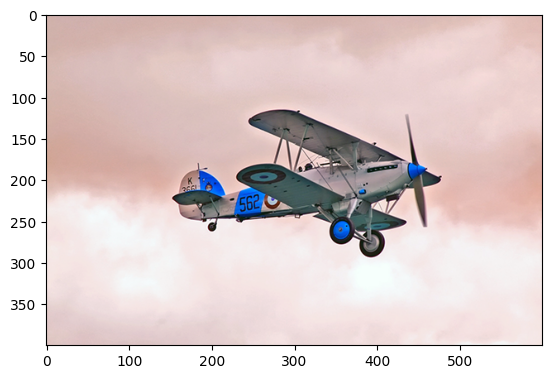

In [19]:
src = cv2.imread('../data/airplane.bmp', cv2.IMREAD_COLOR)
plt.imshow(src)

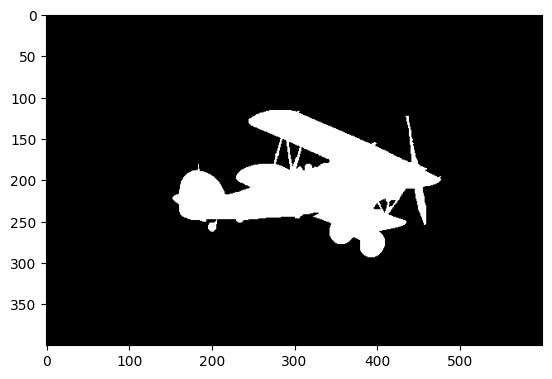

In [20]:
mask = cv2.imread('../data/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap='gray')

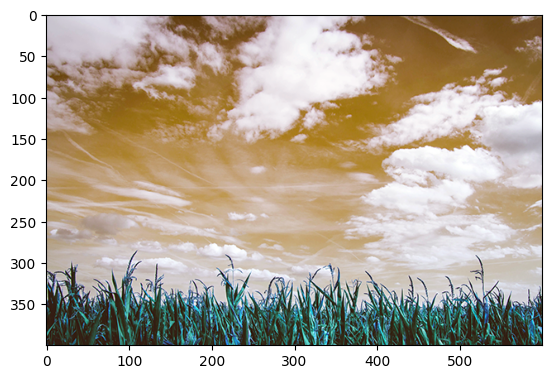

In [22]:
dst = cv2.imread('../data/field.bmp', cv2.IMREAD_COLOR)
plt.imshow(dst)

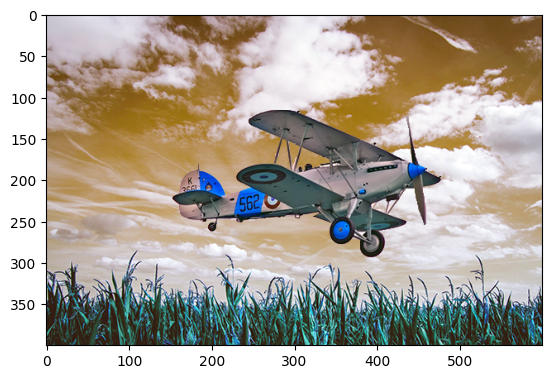

In [23]:
plt.imshow(cv2.copyTo(src, mask, dst))